In [ ]:
import numpy as np
import scipy
from scipy.sparse.linalg import expm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.widgets import Slider, Button

import networkx as nx
from networkx import hypercube_graph
from networkx.drawing.nx_agraph import graphviz_layout

### Functions to implement Classical and Quantum Random Walks

In [ ]:
# Random Walk on A
def random_walk(A, t=0):
    L = A.copy()
    for i in range(A.shape[0]):
        L[i,i] = -len(A[[i], :].nonzero()[0])
    # Set initial location to be "0" node
    p0 = np.zeros(L.shape[0])
    p0[0] = 1
    pt = expm(L*t) @ p0
    return pt

# Quantum Walk on A
def quantum_walk(A, t=0):
    # Set initial location to be "0" node
    psi0 = np.zeros(A.shape[0])
    psi0[0] = 1
    psit = expm(-1j * A *t) @ psi0
    return psit

def draw_walk(G, pvec:np.ndarray, ax, vrange=(0,1), cmap=cm.Purples):
    # Colormap
    norm = Normalize(vmin=vrange[0], vmax=vrange[1])
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

    nx.draw_networkx(
        G,
        ax=ax, 
        pos=graphviz_layout(G, prog="dot"), 
        node_color=[mapper.to_rgba(pvec[i]) for i in range(len(pvec))], 
        node_size=250, 
        with_labels=False
    )
    plt.show()

Visualizing Graph using <code>networkx</code> package

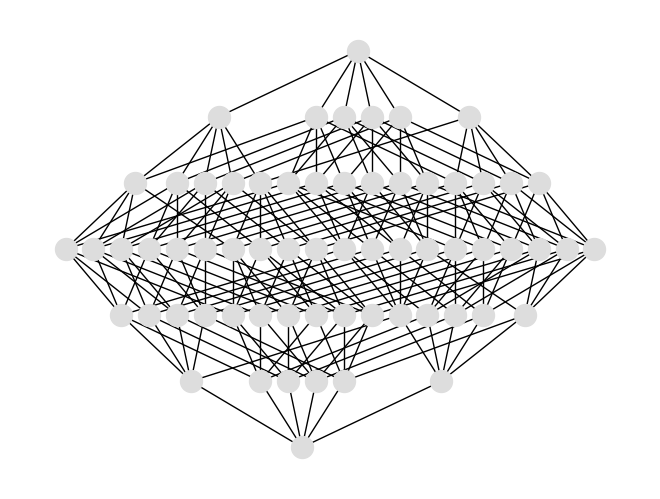

In [12]:
%matplotlib inline
n=6
G = hypercube_graph(n)
A = scipy.sparse.csc_matrix(nx.adjacency_matrix(G))
# Draw graph
nx.draw(G, pos=graphviz_layout(G, prog="dot"), node_color="#dddddd", node_size=250, with_labels=False)
plt.show()

Note: matrix exponentials are done using the <a href="https://en.wikipedia.org/wiki/Pad%C3%A9_approximant">Padé approximation</url>.

## Classical Random Walk

Note that even for irregular graphs, the steady state probability vector is the uniform vector $(1,\dots, 1)/|V|$.

In [ ]:
%matplotlib qt

fig, ax = plt.subplots()

pvec = random_walk(A, 0)
draw_walk(G, pvec, ax)

axtime = fig.add_axes([0.15, 0.05, 0.75, 0.03])
time_slider = Slider(
    ax=axtime,
    label='time',
    valmin=0,
    valmax=5,
    valinit=0,
)

# The function to be called anytime a slider's value changes
def update(val):
    pvec = random_walk(A, val)
    draw_walk(G, pvec, ax)
    fig.canvas.draw_idle()


# Register the update function with each slider
time_slider.on_changed(update)

plt.show()

## Quantum Walk

In [ ]:
%matplotlib qt

fig, ax = plt.subplots()

pvec = np.abs(quantum_walk(A, 0))**2
draw_walk(G, pvec, ax)

axtime = fig.add_axes([0.15, 0.05, 0.75, 0.03])
time_slider = Slider(
    ax=axtime,
    label='time',
    valmin=0,
    valmax=5,
    valinit=0,
)

# The function to be called anytime a slider's value changes
def update(val):
    pvec = np.abs(quantum_walk(A, val))**2
    draw_walk(G, pvec, ax)
    fig.canvas.draw_idle()


# Register the update function with each slider
time_slider.on_changed(update)

plt.show()

## Difference between the 2 Methods
With the <code>cm.seismic</code> colormap,
- Red means *Quantum Walk* will find the node with greater probability
- Blue means *random walk* will find the node with greater probability

In [ ]:
%matplotlib qt

fig, ax = plt.subplots()

pDiff = np.abs(quantum_walk(A))**2 - random_walk(A)
draw_walk(G, pDiff, ax, vrange=(-1, 1), cmap=cm.seismic)

axtime = fig.add_axes([0.15, 0.05, 0.75, 0.03])
time_slider = Slider(
    ax=axtime,
    label='time',
    valmin=0,
    valmax=5,
    valinit=0,
)

# The function to be called anytime a slider's value changes
def update(val):
    pDiff = np.abs(quantum_walk(A, val))**2 - random_walk(A, val)
    draw_walk(G, pDiff, ax, vrange=(-1, 1), cmap=cm.seismic)
    fig.canvas.draw_idle()

# Register the update function with each slider
time_slider.on_changed(update)

plt.show()